<a href="https://colab.research.google.com/github/Aranyaka17/RFM-Analysis/blob/main/RFM_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
customer=pd.read_csv('/content/drive/MyDrive/Miniproject_2/olist_customers_dataset.csv')
order_items=pd.read_csv('/content/drive/MyDrive/Miniproject_2/olist_order_items_dataset.csv')
order_payments=pd.read_csv('/content/drive/MyDrive/Miniproject_2/olist_order_payments_dataset.csv')
order_dataset=pd.read_csv('/content/drive/MyDrive/Miniproject_2/olist_orders_dataset.csv')
products_dataset=pd.read_csv('/content/drive/MyDrive/Miniproject_2/olist_products_dataset.csv')


In [5]:
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
order_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [9]:
products_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
order_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [11]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [12]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


### Merging data:

In [13]:
# Customer-Dataset(customer_id)
customer_order=pd.merge(order_dataset,customer,on='customer_id')
customer_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [14]:
#customer-dataset-Payment(order_id)
order_dataset_payments=pd.merge(customer_order, order_payments, on='order_id')
order_dataset_payments.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,credit_card,3,179.12


In [15]:
# customer-dataset-payment-order_item
order=pd.merge(order_dataset_payments, order_items, on='order_id')
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,credit_card,3,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


In [16]:
# customer-dataset-payment-order_item-product
product_order=pd.merge(order,products_dataset,on='product_id')
product_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,credit_card,3,37.77,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,credit_card,1,37.77,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0


In [17]:
#customer_product_or=pd.merge(order,customer_order,on='customer_id')
#customer_product_or.head()

In [18]:
product_order.head()
product_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117601 non-null  object 
 1   customer_id                    117601 non-null  object 
 2   order_status                   117601 non-null  object 
 3   order_purchase_timestamp       117601 non-null  object 
 4   order_approved_at              117586 non-null  object 
 5   order_delivered_carrier_date   116356 non-null  object 
 6   order_delivered_customer_date  115034 non-null  object 
 7   order_estimated_delivery_date  117601 non-null  object 
 8   customer_unique_id             117601 non-null  object 
 9   customer_zip_code_prefix       117601 non-null  int64  
 10  customer_city                  117601 non-null  object 
 11  customer_state                 117601 non-null  object 
 12  payment_sequential            

In [19]:
# Check the null value
product_order.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1698
product_name_lenght              1698
product_description_lenght       1698
product_photos_qty               1698
product_weig

In [20]:
product_order=product_order.dropna() 
product_order.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm   

In [21]:
product_order.shape

(113390, 30)

### Using groupby to check the order status of different orders

In [22]:
orderstatus=order.groupby('order_status')['order_id'].count().sort_values()
print(orderstatus)

order_status
approved            3
unavailable         7
invoiced          371
processing        375
canceled          566
shipped          1244
delivered      115035
Name: order_id, dtype: int64


### Total number of unique orders and customers in the dataset

In [23]:
n_orders=len(pd.unique(order['order_id']))
print("Number of orders:",n_orders)
customer=len(pd.unique(order['customer_id']))
print("Number of customer:",customer)

Number of orders: 98665
Number of customer: 98665


### Total price and freight value grouped by order_id

In [24]:
order_value = order.groupby('order_id')['price','freight_value'].sum().sort_values(by='price',ascending= False)
order_value.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,price,freight_value
order_id,,
03caa2c082116e1d31e67e9ae3700499,13440.00,224.08
fa65dad1b0e818e3ccc5cb0e39231352,11383.95,1897.76
4bfcba9e084f46c8e3cb49b0fa6e6159,10856.10,255.30
465c2e1bee4561cb39e0db8c5993aafc,9888.00,665.28
f489949dbe23cf9313deb342913ece0c,9520.14,535.08


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72]), <a list of 73 Text major ticklabel objects>)

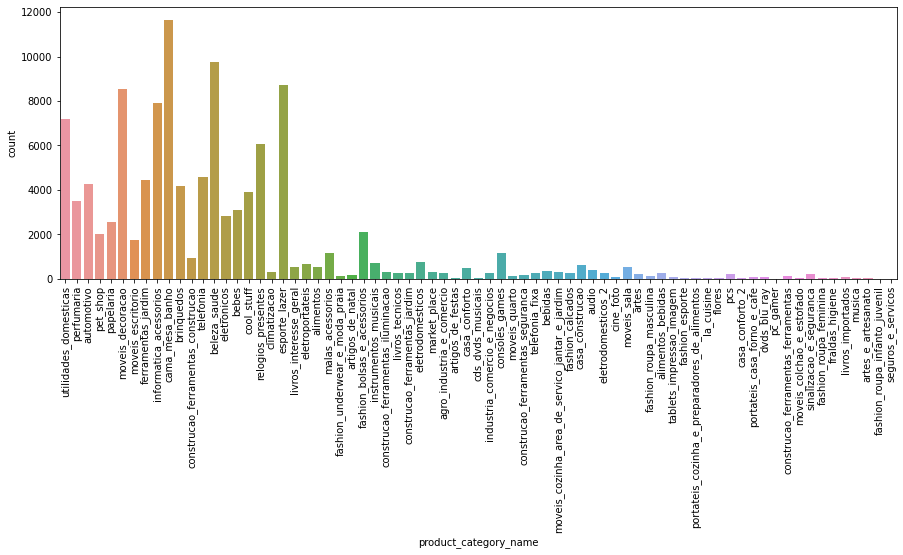

In [25]:
#No of each product bought
plt.figure(figsize=(15,5))
sns.countplot(x=product_order['product_category_name'])
plt.xticks(rotation=90)

In [26]:
# Number of each product brougth
n_p=order.groupby('order_item_id')['product_id'].count()
n_p.head(30)

order_item_id
1     103056
2      10238
3       2375
4        986
5        469
6        262
7         60
8         36
9         28
10        25
11        17
12        13
13         8
14         7
15         5
16         3
17         3
18         3
19         3
20         3
21         1
Name: product_id, dtype: int64

### Time stamp conversion

In [27]:
#convert to timestamp
product_order['order_purchase_timestamp']=pd.to_datetime(product_order['order_purchase_timestamp'])

In [28]:
product_order['order_delivered_customer_date']=pd.to_datetime(product_order['order_delivered_customer_date'])
product_order['year']=product_order['order_purchase_timestamp'].dt.year
product_order['month']=product_order['order_purchase_timestamp'].dt.month
product_order['day']=product_order['order_purchase_timestamp'].dt.day


In [29]:
product_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,year,month,day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2017,10,2
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2017,10,2
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2017,10,2
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,credit_card,3,37.77,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2017,8,15
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,credit_card,1,37.77,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2017,8,2


### Mean monthly income on products

In [30]:
#monthly trend
monthly=product_order.groupby('month')['price'].mean().reset_index()
monthly.columns=['Month','Avg_price']
monthly

,Month,Avg_price
0,1,115.815747
1,2,113.637833
2,3,120.576965
3,4,126.552740
4,5,124.870612
5,6,122.154317
6,7,118.949406
7,8,117.124778
8,9,129.426457
9,10,122.604586


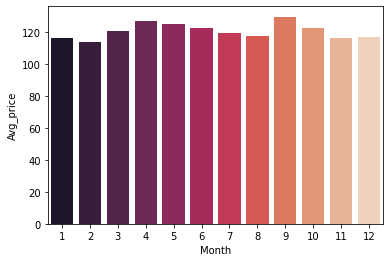

In [31]:
sns.barplot(x='Month',y='Avg_price',data=monthly,palette="rocket")

In [32]:
#monthly trend
month_product=product_order.groupby(['month','product_category_name'])['product_id'].count().reset_index()
month_product.columns=['Month','Product_name','Count']
month_product.head()

,Month,Product_name,Count
0,1,agro_industria_e_comercio,21
1,1,alimentos,21
2,1,alimentos_bebidas,12
3,1,artes,19
4,1,artigos_de_festas,2


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 <a list of 62 Text major ticklabel objects>)

<Figure size 1080x720 with 0 Axes>

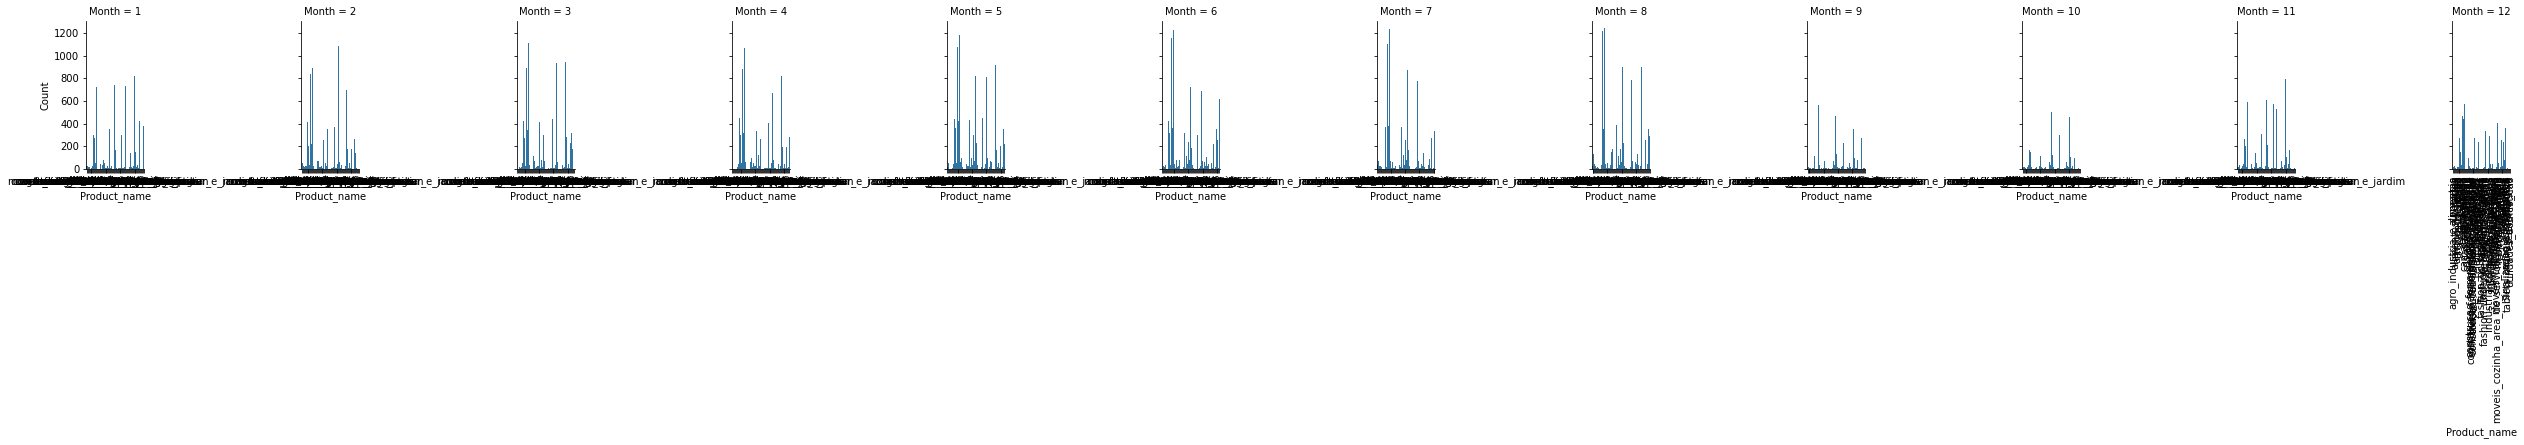

In [33]:
# Number of various product sold monthly
plt.figure(figsize=(15,10))
g=sns.FacetGrid(month_product, col="Month")
#g.map(sns.catplot(y='Count',x='Product_name',data=month_product,col='Month',kind='bar',color="pink"))
g.map(sns.barplot,'Product_name','Count')
plt.xticks(rotation=90)


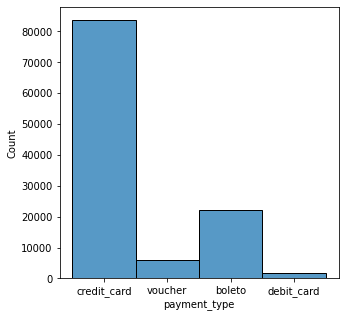

In [34]:
# Which type of payment type is used mostly
plt.figure(figsize=(5,5))
sns.histplot(x='payment_type',data=product_order)

In [35]:
country_price=product_order.groupby('customer_city')['price'].mean().reset_index()
country_price.columns=['city','Mean_transaction']
country_price_sort=country_price.sort_values(by='Mean_transaction',ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

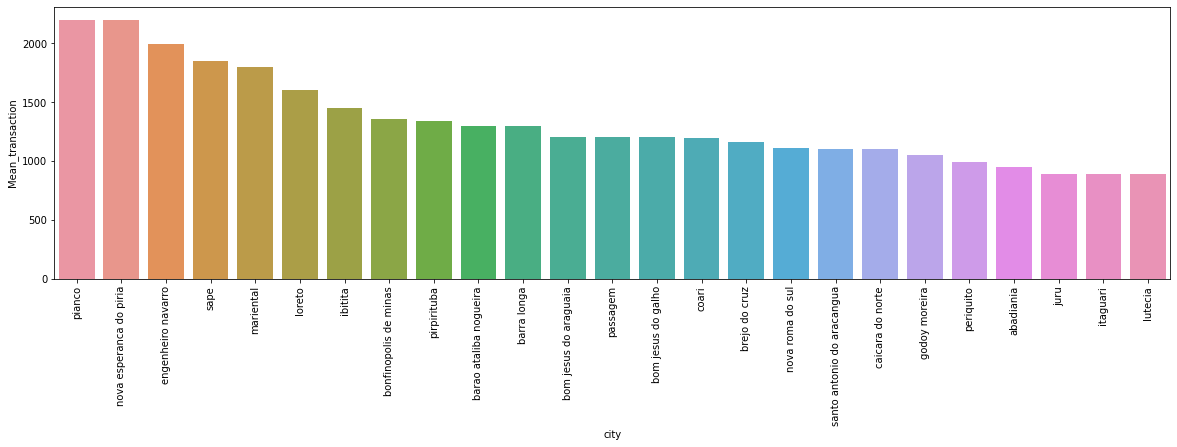

In [36]:
plt.figure(figsize=(20,5))
sns.barplot(x='city',y='Mean_transaction',data=country_price_sort[:25])
plt.xticks(rotation=90)

In [37]:
product_order['order_estimated_delivery_date']=pd.to_datetime(product_order['order_estimated_delivery_date'])

In [38]:
estimated=product_order['order_estimated_delivery_date']
delivery= product_order['order_delivered_customer_date']
avg=(estimated-delivery).mean()

In [39]:
#print(product_order[product_order.isnull().any(axis=1)]['order_delivered_customer_date']
#print(product_order[product_order['order_delivered_customer_date'].isnull()]['order_delivered_customer_date'])

# RFM Analysis

In [40]:
product_order.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm', 'year',
       'month', 'day'],
      dtype='object')

In [41]:
rfm=product_order[['order_id', 'customer_id','order_delivered_customer_date','payment_value', 'order_item_id', 'product_id','price', 'freight_value','year','month', 'day']]
rfm.head()

,order_id,customer_id,order_delivered_customer_date,payment_value,order_item_id,product_id,price,freight_value,year,month,day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-10 21:25:13,18.12,1,87285b34884572647811a353c7ac498a,29.99,8.72,2017,10,2
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-10 21:25:13,2.00,1,87285b34884572647811a353c7ac498a,29.99,8.72,2017,10,2
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-10 21:25:13,18.59,1,87285b34884572647811a353c7ac498a,29.99,8.72,2017,10,2
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,2017-08-18 14:44:43,37.77,1,87285b34884572647811a353c7ac498a,29.99,7.78,2017,8,15
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,2017-08-07 18:30:01,37.77,1,87285b34884572647811a353c7ac498a,29.99,7.78,2017,8,2


In [42]:
max_delivery_date=product_order['order_delivered_customer_date'].max()
print("Most recent delivery date:",max_delivery_date)
min_delivery_date=product_order['order_delivered_customer_date'].min()
print("Oldest order delivered:",min_delivery_date)

Most recent delivery date: 2018-10-17 13:22:46
Oldest order delivered: 2016-10-11 13:46:32


### Recency

In [43]:
present=max_delivery_date

In [44]:
a=product_order.groupby('customer_id')['order_delivered_customer_date'].max().reset_index()
a.columns = ['customer_id','order_delivered_customer_date']
a.head()

,customer_id,order_delivered_customer_date
0,00012a2ce6f8dcda20d059ce98491703,2017-11-28 15:41:30
1,000161a058600d5901f007fab4c27140,2017-07-25 18:57:33
2,0001fd6190edaaf884bcaf3d49edf079,2017-03-06 08:57:49
3,0002414f95344307404f0ace7a26f1d5,2017-09-13 20:06:02
4,000379cdec625522490c315e70c7a9fb,2018-04-13 20:21:08


In [45]:
a['recency']= a['order_delivered_customer_date'].agg(lambda date: (present - date).days)


In [46]:
a=a.drop(['order_delivered_customer_date'],axis=1)
a.sort_values(by=['recency'])

,customer_id,recency
1249,033fab69968b0d69099d64423831a236,0
14816,27ae7c8a8fc20ce80d96f01b6f19961b,5
58938,9e83d47684eb1a58b1c31830f5de10ac,15
94999,ffa87b4246c4848711afb512bd51f161,20
7411,1409b2945191b7aff1975ba2ce9918c5,22
...,...,...
81958,dbfc2fb6a9424037815a3a887c10be61,733
85400,e561a3f61440b031d3be286a696d06eb,734
53537,9031f9dcde5860b34e6c65ac5c796d30,734
47224,7f0ca17bb33b230b47459437cf0682c7,735


### Frequency

In [47]:
f=product_order.groupby('customer_id')['order_id'].count().reset_index()
f.columns = ['customer_id','frequency']
f.head(10)

,customer_id,frequency
0,00012a2ce6f8dcda20d059ce98491703,1
1,000161a058600d5901f007fab4c27140,1
2,0001fd6190edaaf884bcaf3d49edf079,1
3,0002414f95344307404f0ace7a26f1d5,1
4,000379cdec625522490c315e70c7a9fb,1
5,0004164d20a9e969af783496f3408652,1
6,000419c5494106c306a97b5635748086,1
7,00046a560d407e99b969756e0b10f282,1
8,00050bf6e01e69d5c0fd612f1bcfb69c,1
9,000598caf2ef4117407665ac33275130,1


In [48]:
f.sort_values(by='frequency',ascending=False).head(10)

,customer_id,frequency
14576,270c23a11d024a44c896d1894b261a83,63
7268,13aa59158da63ba0e93ec6ac2c07aacb,38
54525,92cd3ec6e2d643d4ebd0e3d6238f69e2,26
50033,86cc80fef09f7f39df4b0dbce48e81cb,24
78373,d22f25a9fadfb1abbc2e29395b1239f4,24
36958,63b964e79dee32a3587651701a2b8dbf,24
41090,6ee2f17e3b6c33d6a9557f280edd2925,24
66440,b246eeed30b362c09d867b9e598bee51,22
29924,50920f8cd0681fd86ebe93670c8fe52e,21
93743,fc3d1daec319d62d49bfb5e1f83123e9,21


### Monetary

In [49]:
m=product_order.groupby('customer_id')['price'].sum().reset_index()
m.columns = ['customer_id','price']
m.head(10)

,customer_id,price
0,00012a2ce6f8dcda20d059ce98491703,89.80
1,000161a058600d5901f007fab4c27140,54.90
2,0001fd6190edaaf884bcaf3d49edf079,179.99
3,0002414f95344307404f0ace7a26f1d5,149.90
4,000379cdec625522490c315e70c7a9fb,93.00
5,0004164d20a9e969af783496f3408652,59.99
6,000419c5494106c306a97b5635748086,34.30
7,00046a560d407e99b969756e0b10f282,120.90
8,00050bf6e01e69d5c0fd612f1bcfb69c,69.99
9,000598caf2ef4117407665ac33275130,1107.00


In [50]:
m.sort_values(by='price',ascending=False).head(10)

,customer_id,price
8196,1617b1357756262bfa56ab541c47bc16,13440.00
82866,de832e8dbb1f588a47013e53feaa67cc,10856.10
36958,63b964e79dee32a3587651701a2b8dbf,9888.00
41197,6f241d5bbb142b6f764387c8c270645a,9520.14
54379,926b6a6fb8b6081e00b335edaf578d35,7998.00
92705,f959b7bc834045511217e6410985963f,7799.40
87702,eb7a157e8da9c488cd4ddc48711f1097,7798.00
88014,ec5b2ba62e574342386871631fafd3fc,7160.00
18309,3118aefef04e5e97d0e339cd75d6d775,6909.00
74189,c6e2731c5b391845f6800c97401a43a9,6735.00


In [51]:
rfm=pd.concat([a['customer_id'],a['recency'],f['frequency'],m['price']],axis=1)
rfm.head(10)

,customer_id,recency,frequency,price
0,00012a2ce6f8dcda20d059ce98491703,322,1,89.80
1,000161a058600d5901f007fab4c27140,448,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,590,1,179.99
3,0002414f95344307404f0ace7a26f1d5,398,1,149.90
4,000379cdec625522490c315e70c7a9fb,186,1,93.00
5,0004164d20a9e969af783496f3408652,544,1,59.99
6,000419c5494106c306a97b5635748086,182,1,34.30
7,00046a560d407e99b969756e0b10f282,294,1,120.90
8,00050bf6e01e69d5c0fd612f1bcfb69c,379,1,69.99
9,000598caf2ef4117407665ac33275130,57,1,1107.00


In [52]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95128 entries, 0 to 95127
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  95128 non-null  object 
 1   recency      95128 non-null  int64  
 2   frequency    95128 non-null  int64  
 3   price        95128 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.9+ MB


In [53]:
rfm.describe()

,recency,frequency,price
count,95128.000000,95128.000000,95128.000000
mean,274.599003,1.191973,143.256142
std,152.227964,0.730957,236.710216
min,0.000000,1.000000,0.850000
25%,153.000000,1.000000,47.490000
50%,255.000000,1.000000,89.000000
75%,385.000000,1.000000,153.492500
max,735.000000,63.000000,13440.000000


In [54]:
rfm['r_quartile']  = pd.qcut(rfm['recency'], q=4, labels=range(1,5))

In [55]:
rfm['m_quartile'] = pd.qcut(rfm['price'], q=4,labels=range(1,5))

In [56]:
rfm.loc[rfm['frequency'] <= 1,'f_quartile'] = '1' 
rfm.loc[rfm['frequency'] > 1,'f_quartile'] = '4' 

In [57]:
set(rfm['f_quartile'])

{'1', '4'}

In [58]:
rfm.head(15)

,customer_id,recency,frequency,price,r_quartile,m_quartile,f_quartile
0,00012a2ce6f8dcda20d059ce98491703,322,1,89.80,3,3,1
1,000161a058600d5901f007fab4c27140,448,1,54.90,4,2,1
2,0001fd6190edaaf884bcaf3d49edf079,590,1,179.99,4,4,1
3,0002414f95344307404f0ace7a26f1d5,398,1,149.90,4,3,1
4,000379cdec625522490c315e70c7a9fb,186,1,93.00,2,3,1
5,0004164d20a9e969af783496f3408652,544,1,59.99,4,2,1
6,000419c5494106c306a97b5635748086,182,1,34.30,2,1,1
7,00046a560d407e99b969756e0b10f282,294,1,120.90,3,3,1
8,00050bf6e01e69d5c0fd612f1bcfb69c,379,1,69.99,3,2,1
9,000598caf2ef4117407665ac33275130,57,1,1107.00,1,4,1


In [59]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,customer_id,recency,frequency,price,r_quartile,m_quartile,f_quartile,RFM_Score
0,00012a2ce6f8dcda20d059ce98491703,322,1,89.80,3,3,1,313
1,000161a058600d5901f007fab4c27140,448,1,54.90,4,2,1,412
2,0001fd6190edaaf884bcaf3d49edf079,590,1,179.99,4,4,1,414
3,0002414f95344307404f0ace7a26f1d5,398,1,149.90,4,3,1,413
4,000379cdec625522490c315e70c7a9fb,186,1,93.00,2,3,1,213


In [60]:
rfm[rfm['RFM_Score']=='444'].sort_values('price', ascending= False).head(10)

,customer_id,recency,frequency,price,r_quartile,m_quartile,f_quartile,RFM_Score
82866,de832e8dbb1f588a47013e53feaa67cc,502,15,10856.10,4,4,4,444
54379,926b6a6fb8b6081e00b335edaf578d35,530,2,7998.00,4,4,4,444
92705,f959b7bc834045511217e6410985963f,395,6,7799.40,4,4,4,444
79021,d3e82ccec3cb5f956a38d96c057ceaae,566,6,5814.00,4,4,4,444
73328,c47f0ed7fbd21fc9be2cfca83f0dd490,436,9,4931.91,4,4,4,444
41090,6ee2f17e3b6c33d6a9557f280edd2925,574,24,4557.60,4,4,4,444
85879,e69714d6b494f7279512327ebcc01889,513,2,4219.80,4,4,4,444
46439,7d03bf20fa96e80468bbf678eebbcb3f,518,3,3597.00,4,4,4,444
3385,0928c1a893356a97b2191a1e812c9914,420,8,3472.00,4,4,4,444
56293,97697c5f77b484cb0cec9eaa81c679d5,392,4,3400.00,4,4,4,444


In [61]:
print("Best Customers: ",len(rfm[rfm['RFM_Score']=='444']))
print('Frequent Customers: ',len(rfm[rfm['f_quartile']=='4']))
print("High spenders: ",len(rfm[rfm['m_quartile']==4]))
print('Customers who did not buy recently: ',len(rfm[rfm['RFM_Score']=='144']))
print('one time buyer: ',len(rfm[rfm['RFM_Score']=='111']))

Best Customers:  1443
Frequent Customers:  12056
High spenders:  23782
Customers who did not buy recently:  1350
one time buyer:  5681


In [62]:
plot=rfm.groupby('RFM_Score')['customer_id'].count().reset_index()
plot.columns=['RFM_score','count']
plot

,RFM_score,count
0,111,5681
1,112,5387
2,113,5416
3,114,4585
4,141,256
5,142,534
6,143,723
7,144,1350
8,211,5739
9,212,5344


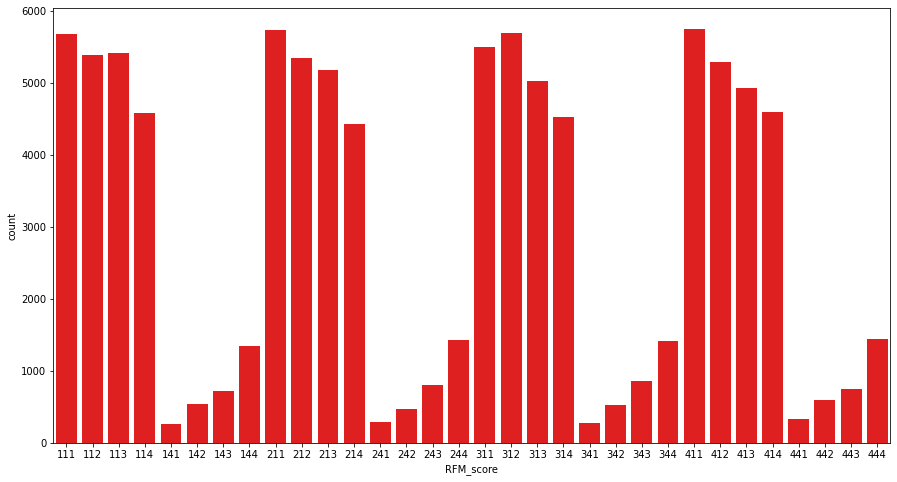

In [63]:
plt.figure(figsize=(15,8))
sns.barplot(x='RFM_score',y='count',data=plot,color='red')